In [1]:
# setting up everything
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import seaborn as sns
import os

from matplotlib import cm
%matplotlib inline

In [2]:
#read data
path="C:/Data/ASTEXT_output/3D/OUT_STAT/"

tmp = glob.glob(path + "*warm*.nc")
f_wadv  = xr.open_dataset(tmp[0])

tmp = glob.glob(path + '*cold*.nc')
f_cadv  = xr.open_dataset(tmp[0])

tmp = glob.glob(path + '*zero*.nc')
f_0adv  = xr.open_dataset(tmp[0])

In [3]:
sns.set(context="talk", style="ticks", font_scale=1)
z = f_cadv['z'].values/1000.
t = f_cadv['time'].values
nz = len(z)
nt = len(t)

myfontsize = 16

In [74]:
def find_zitop(xin, yin):
    posind = np.where(xin > 0.1)
    indmax = np.amax(posind)

    xout = xin[0:indmax]
    yout = yin[0:indmax] 
    return xout, yout

In [93]:
def area_calc(xin, yin):
    posind = xin >= 0.
    negind = xin < 0.

    posArea = np.trapz(xin[posind], x = yin[posind])
    negArea = np.trapz(xin[negind], x = yin[negind])
    
    return posArea, negArea

-0.0
0.07299447
0.06839864
0.056275763
0.042832527


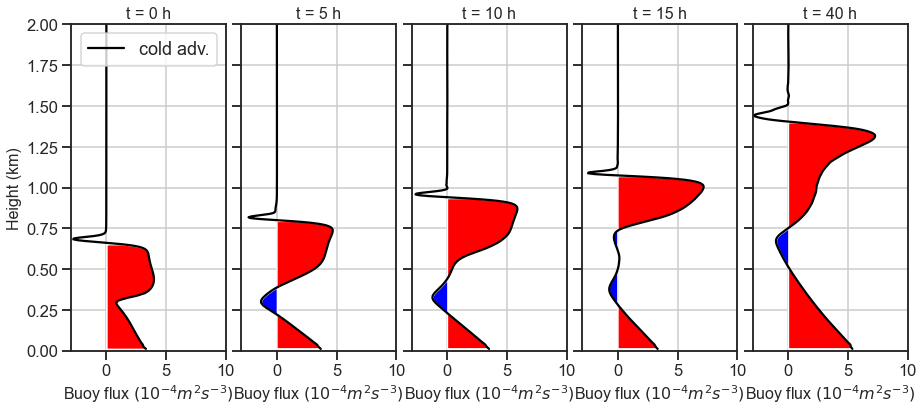

In [96]:
# profiles of scaled temperature and moisture
time_use = [0, 5, 10, 15, 40]

fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(wspace=.1)

axs = axs.ravel()
for i in range(5):
    x = (f_cadv["BUOYA"].values[time_use[i]] + f_cadv["BUOYAS"].values[time_use[i]])*10000.
#     x = (f_cadv["BUOYA"].values[time_use[i]])*10000.
    y = z
    
    axs[i].plot(x, y, label='cold adv.', color='black')
    
    axs[i].set_ylim([0., 2])
    axs[i].set_xlim([-3, 10])
    axs[i].set_xlabel('Buoy flux $(10^{-4} m^2s^{-3})$', fontsize=myfontsize)  # Add an x-label to the axes.
    axs[i].grid(True)
    axs[i].set_title('t = ' + str(time_use[i]) + ' h', fontsize=myfontsize)
        
    x, y = find_zitop(x, y)
        
    area = area_calc(x, y)
    print(-area[1]/area[0])

    axs[i].fill_betweenx(y, 0, x, where=x >= 0, facecolor='red', interpolate=True)
    axs[i].fill_betweenx(y, 0, x, where=x <= 0, facecolor='blue', interpolate=True)
    
    if i > 0:
        axs[i].yaxis.set_major_formatter(plt.NullFormatter())
    
    if i==0:
        axs[i].set_ylabel('Height (km)', fontsize=myfontsize)  # Add a y-label to the axes.
        axs[i].legend(loc=1, fontsize=18)

-0.0
0.116407625
0.101904646
0.17513359
0.17864262


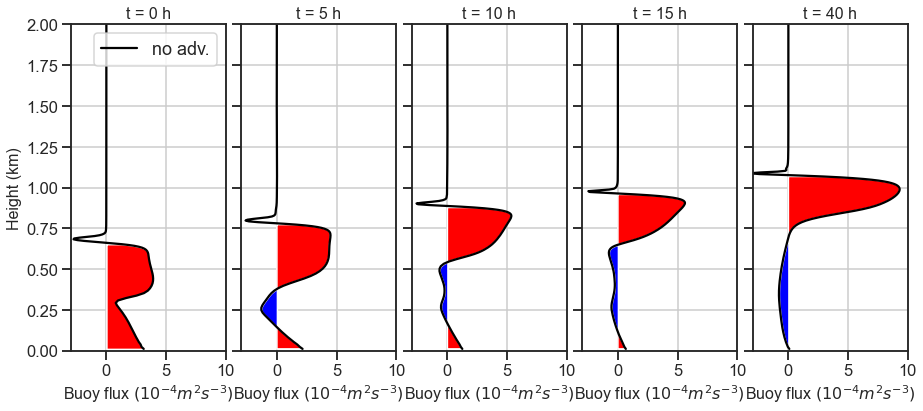

In [90]:
# profiles of scaled temperature and moisture
time_use = [0, 5, 10, 15, 40]

fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(wspace=.1)

axs = axs.ravel()
for i in range(5):
    x = (f_0adv["BUOYA"].values[time_use[i]] + f_0adv["BUOYAS"].values[time_use[i]])*10000.
    y = z
    
    axs[i].plot(x, y, label='no adv.', color='black')
    
    axs[i].set_ylim([0., 2])
    axs[i].set_xlim([-3, 10])
    axs[i].set_xlabel('Buoy flux $(10^{-4} m^2s^{-3})$', fontsize=myfontsize)  # Add an x-label to the axes.
    axs[i].grid(True)
    axs[i].set_title('t = ' + str(time_use[i]) + ' h', fontsize=myfontsize)
        
    x, y = find_zitop(x, y)
        
    area = area_calc(x, y)
    print(-area[1]/area[0])

    axs[i].fill_betweenx(y, 0, x, where=x >= 0, facecolor='red', interpolate=True)
    axs[i].fill_betweenx(y, 0, x, where=x <= 0, facecolor='blue', interpolate=True)
    
    if i > 0:
        axs[i].yaxis.set_major_formatter(plt.NullFormatter())
    
    if i==0:
        axs[i].set_ylabel('Height (km)', fontsize=myfontsize)  # Add a y-label to the axes.
        axs[i].legend(loc=1, fontsize=18)

-0.0
0.119659476
0.23489417
0.28312314
0.28746152


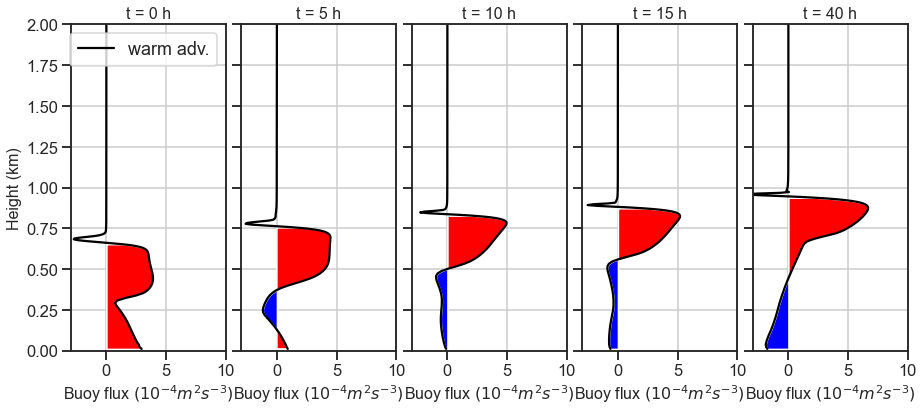

In [91]:
# profiles of scaled temperature and moisture
time_use = [0, 5, 10, 15, 40]

fig, axs = plt.subplots(1,5, figsize=(15, 6))
fig.subplots_adjust(wspace=.1)

axs = axs.ravel()
for i in range(5):
    x = (f_wadv["BUOYA"].values[time_use[i]] + f_wadv["BUOYAS"].values[time_use[i]])*10000.
    y = z
    
    axs[i].plot(x, y, label='warm adv.', color='black')
    
    axs[i].set_ylim([0., 2])
    axs[i].set_xlim([-3, 10])
    axs[i].set_xlabel('Buoy flux $(10^{-4} m^2s^{-3})$', fontsize=myfontsize)  # Add an x-label to the axes.
    axs[i].grid(True)
    axs[i].set_title('t = ' + str(time_use[i]) + ' h', fontsize=myfontsize)
        
    x, y = find_zitop(x, y)
        
    area = area_calc(x, y)
    print(-area[1]/area[0])

    axs[i].fill_betweenx(y, 0, x, where=x >= 0, facecolor='red', interpolate=True)
    axs[i].fill_betweenx(y, 0, x, where=x <= 0, facecolor='blue', interpolate=True)
    
    if i > 0:
        axs[i].yaxis.set_major_formatter(plt.NullFormatter())
    
    if i==0:
        axs[i].set_ylabel('Height (km)', fontsize=myfontsize)  # Add a y-label to the axes.
        axs[i].legend(loc=1, fontsize=18)